# Import Data

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ngoding/freelance/masdani/Hochrechnungsreport_2018.csv')

In [4]:
df

,Departement,Amt,Debitor,DSTNr,Vetriebsweg,MWST,VTyp,VereinbarungNr,VertragsName,LeitungsKategorie,Marktleistungsgruppe,Marktleistung,MaterialNr,Material,PSPElement,MonthlyPrizePerUnit,UnitName,Periode,Amount,Verrechnungsbetrag,AbweichungMenge,AbweichungPreis,LineareHochrechnung,ExtrapolierteHochrechnung
0,BG,AB-BA,LVDR001117,109,KS,False,SLA,540000190,Applikationen betreiben BWL-SAP,Applikationen betreiben,Betriebswirtschaftliche Lösungen,BWL FI: Finanzwesen/Controlling,540003063,FIP Zähler: ML-User,KW01-00202.007.002,0.71,Stück,2021.01,30,21.3,NaN,NaN,255.6,255.6
1,BG,AB-BA,LVDR001117,109,KS,False,SLA,540000190,Applikationen betreiben BWL-SAP,Applikationen betreiben,Betriebswirtschaftliche Lösungen,BWL FI: Finanzwesen/Controlling,540003085,KLR Zähler: ML-User,KW01-00202.007.002,0.71,Stück,2021.01,3,2.13,NaN,NaN,25.56,25.56
2,BG,AB-BA,LVDR001117,109,KS,False,SLA,540000190,Applikationen betreiben BWL-SAP,Applikationen betreiben,Betriebswirtschaftliche Lösungen,BWL FI: Finanzwesen/Controlling,540003095,KWF T-Shirt: Medium,KW01-00202.007.002,100.33,Stück,2021.01,1,100.33,NaN,NaN,1'203.96,1'203.96
3,BG,AB-BA,LVDR001117,109,KS,False,SLA,540000190,Applikationen betreiben BWL-SAP,Applikationen betreiben,Betriebswirtschaftliche Lösungen,BWL FI: Finanzwesen/Controlling,540003096,KWF Zähler: ML-User,KW01-00202.007.002,0.71,Stück,2021.01,30,21.3,NaN,NaN,255.6,255.6
4,BG,AB-BA,LVDR001117,109,KS,False,SLA,540000190,Applikationen betreiben BWL-SAP,Applikationen betreiben,Betriebswirtschaftliche Lösungen,BWL FS: Fachsupport,540003199,FS_SAP Zähler: SAP-User,KW01-00202.007.007,0.35,Stück,2021.01,3,1.05,NaN,NaN,12.6,12.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91750,WBF,ZIVI,LVDR001093,735,KS,False,SLA,540001245,Zuverlässig vernetzen,Zuverlässig vernetzen,Datenkommunikation,IP LAN,540002150,IP LAN Office Switch,KW01-00301.001.001,6,# installierte LAN-Ports,2021.09,8,48,0,0,576,576
91751,WBF,ZIVI,LVDR001093,735,KS,False,SLA,540001245,Zuverlässig vernetzen,Zuverlässig vernetzen,Datenkommunikation,IP LAN,540000507,IP LAN Wirecenter Switch Standard,KW01-00301.001.001,6,# installierte LAN-Ports,2021.09,512,3'072.00,0,0,36'864.00,36'864.00
91752,WBF,ZIVI,LVDR001093,735,KS,False,SLA,540001245,Zuverlässig vernetzen,Zuverlässig vernetzen,Datenkommunikation,IP WAN,540000661,IP WAN CIR 10 Mbit/s Silber,KW01-00301.001.002,1'800.00,# SAP,2021.09,3,5'400.00,0,0,64'800.00,64'800.00
91753,WBF,ZIVI,LVDR001093,735,KS,False,SLA,540001245,Zuverlässig vernetzen,Zuverlässig vernetzen,Datenkommunikation,IP WAN,540000667,IP WAN CIR 50 Mbit/s Silber,KW01-00301.001.002,2'500.00,# SAP,2021.09,5,12'500.00,0,0,150'000.00,150'000.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91755 entries, 0 to 91754
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Departement                91755 non-null  object 
 1   Amt                        91755 non-null  object 
 2   Debitor                    91755 non-null  object 
 3   DSTNr                      91755 non-null  int64  
 4   Vetriebsweg                91755 non-null  object 
 5   MWST                       91755 non-null  bool   
 6   VTyp                       91755 non-null  object 
 7   VereinbarungNr             91755 non-null  int64  
 8   VertragsName               91755 non-null  object 
 9   LeitungsKategorie          91755 non-null  object 
 10  Marktleistungsgruppe       91755 non-null  object 
 11  Marktleistung              91755 non-null  object 
 12  MaterialNr                 91755 non-null  int64  
 13  Material                   91755 non-null  obj

In [7]:
df = df[['Marktleistung', 'Verrechnungsbetrag']]

In [8]:
df

,Marktleistung,Verrechnungsbetrag
0,BWL FI: Finanzwesen/Controlling,21.3
1,BWL FI: Finanzwesen/Controlling,2.13
2,BWL FI: Finanzwesen/Controlling,100.33
3,BWL FI: Finanzwesen/Controlling,21.3
4,BWL FS: Fachsupport,1.05
...,...,...
91750,IP LAN,48
91751,IP LAN,3'072.00
91752,IP WAN,5'400.00
91753,IP WAN,12'500.00


In [18]:
df['Marktleistung'].value_counts()

Arbeitsplatz Software Schale 2     10809
Betrieb Fachanwendung               5202
BWL FI: Finanzwesen/Controlling     3834
Arbeitsplatz Software Schale 3      3249
Mobile Abo Voice und Data           2934
                                   ...  
VDI-Service                           18
File Transfer Service                 18
ePortal                               18
Speziallösung                         18
Managed Proxy Service                 18
Name: Marktleistung, Length: 114, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91755 entries, 0 to 91754
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Marktleistung       91755 non-null  category
 1   Verrechnungsbetrag  91755 non-null  object  
 2   Marktleistung_num   91755 non-null  int8    
dtypes: category(1), int8(1), object(1)
memory usage: 902.1+ KB


In [ ]:
df['Verrechnungsbetrag'] = df['Verrechnungsbetrag'].str.replace(r'\D', '')

In [ ]:
df['Verrechnungsbetrag'] = df['Verrechnungsbetrag'].astype(float)

In [ ]:
df['Marktleistung'] = df['Marktleistung'].astype('category')
df['Marktleistung_num'] = df['Marktleistung'].cat.codes

In [29]:
df

,Marktleistung,Verrechnungsbetrag,Marktleistung_num
0,BWL FI: Finanzwesen/Controlling,213.0,8
1,BWL FI: Finanzwesen/Controlling,213.0,8
2,BWL FI: Finanzwesen/Controlling,10033.0,8
3,BWL FI: Finanzwesen/Controlling,213.0,8
4,BWL FS: Fachsupport,105.0,9
...,...,...,...
91750,IP LAN,48.0,37
91751,IP LAN,307200.0,37
91752,IP WAN,540000.0,38
91753,IP WAN,1250000.0,38


In [30]:
df['Marktleistung_num'].corr(df['Verrechnungsbetrag'])

-0.006045351133844474

In [35]:
corr_rank = df.corr()
corr_rank["Marktleistung_num"].sort_values(ascending=False)

Marktleistung_num     1.000000
Verrechnungsbetrag   -0.006045
Name: Marktleistung_num, dtype: float64

In [37]:
df = df.rename(columns={"Marktleistung": "Item", "Verrechnungsbetrag": "Transaction"})

In [39]:
data = df

# corr

In [40]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display

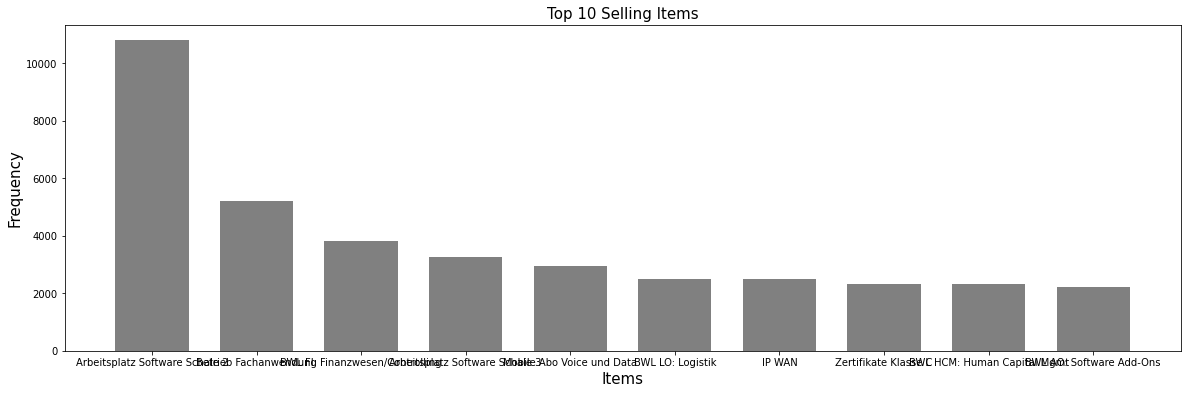

In [44]:
items = data['Item'].value_counts().index
item_frequency = data['Item'].value_counts().values
plt.figure(figsize=(20,6))
plt.xlabel('Items', fontsize='15')
plt.ylabel('Frequency', fontsize='15')
plt.title('Top 10 Selling Items', fontsize='15')
plt.bar(items[:10],item_frequency[:10], width = 0.7, color="gray",linewidth=0.4)
plt.show()

In [53]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().to_numpy()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]

In [54]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item)


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item)


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders)

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [55]:
#Data Transformation
#Transforming original dataframe into the expected format: Series
orders_series = data.set_index('Transaction')['Item']
#Display series as dataframe for cosmetic purposes
display(pd.DataFrame(orders_series.head(10))) 

,Item
Transaction,
213.0,BWL FI: Finanzwesen/Controlling
213.0,BWL FI: Finanzwesen/Controlling
10033.0,BWL FI: Finanzwesen/Controlling
213.0,BWL FI: Finanzwesen/Controlling
105.0,BWL FS: Fachsupport
5.0,BWL HCM: Human Capital Mgmt
3195.0,BWL HCM: Human Capital Mgmt
2866.0,BWL HCM: Human Capital Mgmt
3905.0,BWL HCM: Human Capital Mgmt


In [56]:
#Data mining
rules = association_rules(orders_series, 0.01)

Starting order_item:                  91755
Items with support >= 0.01:              83
Remaining order_item:                 90009
Remaining orders with 2+ items:        5302
Remaining order_item:                 83563
Item pairs:                             982
Item pairs with support >= 0.01:        112



In [57]:
display(rules.sort_values('confidenceBtoA', ascending=False).head(10))

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
11,Arbeitsplatz Software Schale 3,Arbeitsplatz Software Schale 3,2590,0.488495,2949,0.556205,2949,0.556205,0.878264,0.878264,1.579028
102,Arbeitsplatz Software Schale 2,Internet,600,0.113165,10329,1.948133,1189,0.224255,0.058089,0.504626,0.259030
12,BWL SAP-Analytics (non SAP-Data),BWL SAP-Analytics (non SAP-Data),144,0.027160,315,0.059412,315,0.059412,0.457143,0.457143,7.694512
7,Software Schale 3a,Software Schale 3a,585,0.110336,1386,0.261411,1386,0.261411,0.422078,0.422078,1.614616
14,Secure Messaging Extern,Arbeitsplatz Software Schale 3,1111,0.209544,1426,0.268955,2949,0.556205,0.779102,0.376738,1.400746
101,Arbeitsplatz Software Schale 2,Software Schale 3a,426,0.080347,10329,1.948133,1386,0.261411,0.041243,0.307359,0.157771
9,Secure Messaging Extern,Secure Messaging Extern,353,0.066579,1426,0.268955,1426,0.268955,0.247546,0.247546,0.920397
2,Arbeitsplatz Software Schale 2,Arbeitsplatz Software Schale 2,2102,0.396454,10329,1.948133,10329,1.948133,0.203505,0.203505,0.104461
111,Arbeitsplatz Software Schale 2,RAS-Wartung,57,0.010751,10329,1.948133,283,0.053376,0.005518,0.201413,0.103388
23,Mobile Abo Voice und Data,Mobile Nutzung,121,0.022822,2779,0.524142,601,0.113353,0.043541,0.201331,0.384116


In [58]:
rules

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
12,BWL SAP-Analytics (non SAP-Data),BWL SAP-Analytics (non SAP-Data),144,0.027160,315,0.059412,315,0.059412,0.457143,0.457143,7.694512
24,Digital Asset Management SD,Digital Asset Management SD,84,0.015843,495,0.093361,495,0.093361,0.169697,0.169697,1.817643
7,Software Schale 3a,Software Schale 3a,585,0.110336,1386,0.261411,1386,0.261411,0.422078,0.422078,1.614616
11,Arbeitsplatz Software Schale 3,Arbeitsplatz Software Schale 3,2590,0.488495,2949,0.556205,2949,0.556205,0.878264,0.878264,1.579028
14,Secure Messaging Extern,Arbeitsplatz Software Schale 3,1111,0.209544,1426,0.268955,2949,0.556205,0.779102,0.376738,1.400746
...,...,...,...,...,...,...,...,...,...,...,...
100,Arbeitsplatz Software Schale 2,Arbeitsplatz Software Schale 3,275,0.051867,10329,1.948133,2949,0.556205,0.026624,0.093252,0.047867
18,Arbeitsplatz Software Schale 2,Secure Messaging Extern,126,0.023765,10329,1.948133,1426,0.268955,0.012199,0.088359,0.045356
106,Druckgeräte,Arbeitsplatz Software Schale 2,57,0.010751,673,0.126933,10329,1.948133,0.084695,0.005518,0.043475
0,BWL FI: Finanzwesen/Controlling,BWL FI: Finanzwesen/Controlling,117,0.022067,3834,0.723123,3834,0.723123,0.030516,0.030516,0.042201
